<a href="https://colab.research.google.com/github/rahul-727/ADA_Project/blob/main/2348544_Ada_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Dataset

In [ ]:
import os
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/cnbc_news_datase.csv'
df = pd.read_csv(file_path)

df.head(5)

,index,title,url,published_at,author,publisher,short_description,keywords,header_image,raw_description,description,scraped_at
0,0,Santoli’s Wednesday market notes: Could Septem...,https://www.cnbc.com/2021/09/29/santolis-wedne...,2021-09-29T17:09:39+0000,Michael Santoli,CNBC,"This is the daily notebook of Mike Santoli, CN...","cnbc, Premium, Articles, Investment strategy, ...",https://image.cnbcfm.com/api/v1/image/10694960...,"<div class=""group""><p><em>This is the daily no...","This is the daily notebook of Mike Santoli, CN...",2021-10-30 14:11:23.709372
1,1,My take on the early Brexit winners and losers,https://www.cnbc.com/2016/06/24/ian-bremmers-t...,2016-06-24T13:50:48-0400,NaN,CNBC,This commentary originally ran on Facebook. Bo...,"Articles, Politics, Europe News, European Cent...",https://fm.cnbc.com/applications/cnbc.com/reso...,NaN,NaN,2021-10-30 14:11:23.820139
2,2,Europe&#039;s recovery depends on Renzi&#039;s...,https://www.cnbc.com/2014/03/25/europes-recove...,2014-03-25T13:29:45-0400,NaN,CNBC,"In spring, ambitious reforms began in Italy. U...","Articles, Business News, Economy, Europe Econo...",https://fm.cnbc.com/applications/cnbc.com/reso...,NaN,NaN,2021-10-30 14:11:23.854710
3,3,US Moves Closer to Becoming A Major Shareholde...,https://www.cnbc.com/2009/04/22/us-moves-close...,2009-04-22T19:49:03+0000,Michelle Caruso-Cabrera,CNBC,The US government is increasingly likely to co...,"cnbc, Articles, General Motors Co, Business Ne...",https://image.cnbcfm.com/api/v1/image/24947979...,"<div class=""group""><p>The US government is inc...",The US government is increasingly likely to co...,2021-10-30 14:11:24.261143
4,4,Trump: 'Mission accomplished' on 'perfectly ex...,https://www.cnbc.com/2018/04/14/trump-mission-...,2018-04-14T14:59:04+0000,Javier E. David,CNBC,NaN,"cnbc, Articles, George W. Bush, Vladimir Putin...",https://image.cnbcfm.com/api/v1/image/10513177...,"<div class=""group""></div>,<div class=""group""><...",President Donald Trump hailed the U.S.-led int...,2021-10-30 14:11:24.489490


# Data Overview

In [ ]:
# Get basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Display some statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              625 non-null    int64 
 1   title              625 non-null    object
 2   url                625 non-null    object
 3   published_at       625 non-null    object
 4   author             397 non-null    object
 5   publisher          625 non-null    object
 6   short_description  609 non-null    object
 7   keywords           625 non-null    object
 8   header_image       625 non-null    object
 9   raw_description    594 non-null    object
 10  description        593 non-null    object
 11  scraped_at         625 non-null    object
dtypes: int64(1), object(11)
memory usage: 58.7+ KB


,index,title,url,published_at,author,publisher,short_description,keywords,header_image,raw_description,description,scraped_at
count,625.000000,625,625,625,397,625,609,625,625,594,593,625
unique,NaN,625,625,625,201,1,609,581,479,594,593,625
top,NaN,Santoli’s Wednesday market notes: Could Septem...,https://www.cnbc.com/2021/09/29/santolis-wedne...,2021-09-29T17:09:39+0000,Lee Brodie,CNBC,"This is the daily notebook of Mike Santoli, CN...","cnbc, Articles, CNBC TV, Fast Money, source:ta...",https://sc.cnbcfm.com/applications/cnbc.com/st...,"<div class=""group""><p><em>This is the daily no...","This is the daily notebook of Mike Santoli, CN...",2021-10-30 14:11:23.709372
freq,NaN,1,1,1,24,625,1,10,141,1,1,1
mean,312.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,180.566239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,156.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,312.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,468.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Cleaning

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values
df.dropna(subset=['raw_description'], inplace=True)  # Keeping only rows with descriptions

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 594 entries, 0 to 624
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              594 non-null    int64 
 1   title              594 non-null    object
 2   url                594 non-null    object
 3   published_at       594 non-null    object
 4   author             380 non-null    object
 5   publisher          594 non-null    object
 6   short_description  579 non-null    object
 7   keywords           594 non-null    object
 8   header_image       594 non-null    object
 9   raw_description    594 non-null    object
 10  description        593 non-null    object
 11  scraped_at         594 non-null    object
dtypes: int64(1), object(11)
memory usage: 60.3+ KB


# Text Preprocessing

In [ ]:
import re
from bs4 import BeautifulSoup

def clean_text(html):
    # Remove HTML tags
    soup = BeautifulSoup(html, 'html.parser')
    text = soup.get_text()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    return text

# Apply the cleaning function to the raw descriptions
df['cleaned_description'] = df['raw_description'].apply(clean_text)

# Display the cleaned descriptions
df[['raw_description', 'cleaned_description']].head()


,raw_description,cleaned_description
0,"<div class=""group""><p><em>This is the daily no...",This is the daily notebook of Mike Santoli CNB...
3,"<div class=""group""><p>The US government is inc...",The US government is increasingly likely to co...
4,"<div class=""group""></div>,<div class=""group""><...",President Donald Trump hailed the USled interv...
5,"<div class=""group""><p><a href=""//www.cnbc.com/...",Chevron Chief Executive John Watson told CNBC ...
7,"<div class=""group""><p>LONDON — European stocks...",LONDON European stocks closed higher on Thurs...


In [ ]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_financial_news.csv', index=False)

# Distribution of Text Lengths

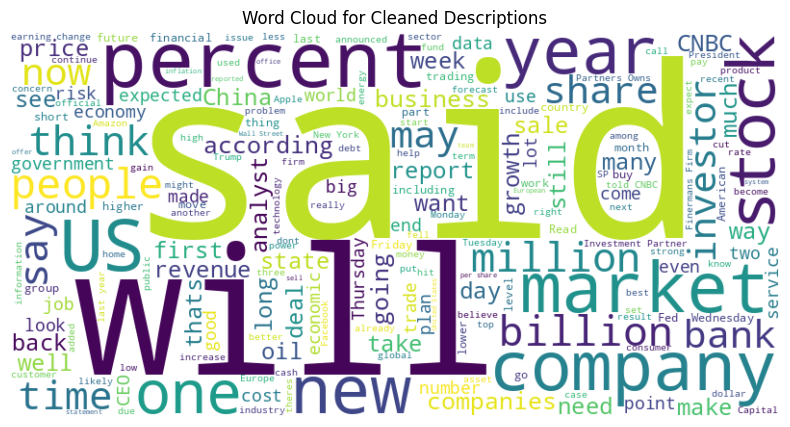

In [ ]:
# Word Cloud for Cleaned Descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cleaned Descriptions')
plt.show()

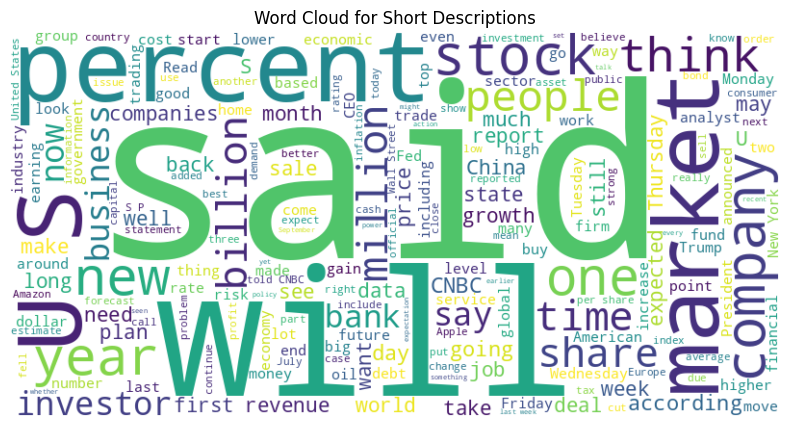

In [ ]:
# Handle non-string values
df2 = df.copy()
df2['short_description'] = df2['short_description'].apply(lambda x: str(x) if not isinstance(x, str) else x)

# Word Cloud for Short Descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df2['short_description']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Short Descriptions')
plt.show()

# Data Preparation for Summarization
Splitting Data: Split your data into training and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {train_df.shape[0]}")
print(f"Validation set size: {val_df.shape[0]}")


Training set size: 475
Validation set size: 119


In [ ]:
# Check for any non-string or NaN values in the data
print(train_df[['cleaned_description', 'short_description']].applymap(lambda x: type(x)))
train_df[['cleaned_description', 'short_description']].isnull().sum()

# Display rows with NaN values or non-string types
invalid_rows = train_df[(train_df['cleaned_description'].isnull()) | (train_df['short_description'].isnull())]
print(invalid_rows)


    cleaned_description short_description
166       <class 'str'>     <class 'str'>
580       <class 'str'>     <class 'str'>
141       <class 'str'>     <class 'str'>
472       <class 'str'>     <class 'str'>
301       <class 'str'>     <class 'str'>
..                  ...               ...
79        <class 'str'>     <class 'str'>
115       <class 'str'>     <class 'str'>
284       <class 'str'>     <class 'str'>
457       <class 'str'>     <class 'str'>
110       <class 'str'>     <class 'str'>

[475 rows x 2 columns]
     index                                              title  \
596    596  Free Trade Critical to Expanding Trade Opportu...   
371    371  Air India plane escorted by fighters to land i...   
184    184  Apple's $1 billion data center gets Irish High...   
19      19                           The Materials Of A Trade   
157    157              The Stocks Analysts Are Talking About   
473    473  New TalentBin Interest Scores to Provide Recru...   
482    482  Brita

<ipython-input-10-530fcb169d86>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(train_df[['cleaned_description', 'short_description']].applymap(lambda x: type(x)))


In [ ]:
# Remove rows with NaN values
train_df = train_df.dropna(subset=['cleaned_description', 'short_description'])
val_df = val_df.dropna(subset=['cleaned_description', 'short_description'])

# Convert all columns to string types
train_df['cleaned_description'] = train_df['cleaned_description'].astype(str)
train_df['short_description'] = train_df['short_description'].astype(str)

val_df['cleaned_description'] = val_df['cleaned_description'].astype(str)
val_df['short_description'] = val_df['short_description'].astype(str)

<ipython-input-11-0d11d156a79f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['cleaned_description'] = train_df['cleaned_description'].astype(str)
<ipython-input-11-0d11d156a79f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['short_description'] = train_df['short_description'].astype(str)
<ipython-input-11-0d11d156a79f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Data Selection: For abstractive summarization, you need input data (e.g., cleaned_description) and target summaries (e.g., short_description).

In [ ]:
train_texts = train_df['cleaned_description'].tolist()
train_summaries = train_df['short_description'].tolist()

val_texts = val_df['cleaned_description'].tolist()
val_summaries = val_df['short_description'].tolist()

Choosing a Summarization Model

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the pre-trained T5 model and tokenizer
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

# Encoding the Data:
Convert the input texts and summaries into tokenized format:

In [ ]:
def encode_data(texts, summaries, tokenizer, max_length=512):
    input_encodings = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')
    target_encodings = tokenizer(summaries, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

    return input_encodings, target_encodings

In [ ]:
train_encodings, train_target_encodings = encode_data(train_texts, train_summaries, tokenizer)
val_encodings, val_target_encodings = encode_data(val_texts, val_summaries, tokenizer)

In [ ]:
import torch

class SummarizationDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels['input_ids'][idx])
        return item

    def __len__(self):
        return len(self.labels['input_ids'])

In [ ]:
# Create PyTorch datasets
train_dataset = SummarizationDataset(train_encodings, train_target_encodings)
val_dataset = SummarizationDataset(val_encodings, val_target_encodings)


In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)


# Train the model
trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-c5ee8488c34f>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-20-c5ee8488c34f>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels['input_ids'][idx])


Step,Training Loss,Validation Loss
10,13.634800,15.296994
20,14.385000,14.980204
30,13.997300,14.427835
40,13.183600,13.653576
50,11.855800,12.670333
60,11.817500,11.535653
70,10.963200,10.297147
80,9.900400,9.025523
90,7.992300,7.899467
100,7.894100,6.889702


TrainOutput(global_step=177, training_loss=8.34583568572998, metrics={'train_runtime': 179.8205, 'train_samples_per_second': 7.758, 'train_steps_per_second': 0.984, 'total_flos': 188801813053440.0, 'train_loss': 8.34583568572998, 'epoch': 3.0})

In [ ]:
import torch

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Move model to the device
model.to(device)

# Move validation encodings to the device
val_input_ids = val_encodings['input_ids'].to(device)
val_attention_mask = val_encodings['attention_mask'].to(device)


In [ ]:
decoded_preds = []

for i in range(len(val_input_ids)):
    input_ids = val_input_ids[i:i+1].to(device)
    attention_mask = val_attention_mask[i:i+1].to(device)

    # Generate summary
    pred = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=150,
        num_beams=5,
        no_repeat_ngram_size=2,
        early_stopping=True,
        length_penalty=1.2
    )

    # Decode the summary
    decoded_pred = tokenizer.decode(pred[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    decoded_preds.append(decoded_pred)

import textwrap

# Define the maximum width for each line
max_width = 80

# Compare the decoded summaries with the actual summaries
for i in range(5):
    print(f"\n{'='*80}")
    print(f"Original Summary {i+1}:")
    print(textwrap.fill(val_summaries[i], width=max_width))
    print("\nGenerated Summary:")
    print(textwrap.fill(decoded_preds[i], width=max_width))
    print(f"{'='*80}\n")



Original Summary 1:
China's retail sales growth surged in August to its quickest pace in more than
three years, beating forecasts, but analysts said the jump largely reflected
stronger inflation, not necessarily quicker underlying growth. Retail sales,
which are tracked in nominal terms, grew 17.1% from a year earlier, compared
with 16.4% in July. The uptick roughly tracked a rise in annual consumer
inflation in August to 6.5%, from 5.6% in July. "Retail sales growth is
obviously strong. The problem is that the figures are being pushed up by the
rising inflation as well. So actually, on a real basis, I don't think there's
much of an acceleration," said Paul Cavey, an economist with Macquarie
Securities in Hong Kong. August's pace, the quickest since May 2004, beat
economists' expectations of a 16.5% rise. Consumer inflation data, released on
Tuesday, also surprised on the upside. Beijing would welcome an increase in real
buying activity by the country's consumers. It is trying to tilt

In [ ]:
import textwrap

# Define the maximum width for each line
max_width = 80

# Test input: raw financial news
test_news = """
The stock market witnessed a significant surge today, with major indices hitting all-time highs.
Investors reacted positively to the latest earnings reports, which showed better-than-expected results from several tech giants.
Additionally, the Federal Reserve's decision to keep interest rates unchanged contributed to the bullish sentiment.
As a result, the S&P 500 rose by 2.5%, while the NASDAQ climbed by 3%. Analysts are optimistic about the continued growth in the market,
though they caution that inflation remains a concern.
"""

# Tokenize the input
test_encoding = tokenizer.encode(test_news, return_tensors="pt", max_length=512, truncation=True).to(device)

# Generate the summary
generated_summary = model.generate(
    test_encoding,
    max_length=300,
    num_beams=7,
    early_stopping=True,
    no_repeat_ngram_size=2,
    length_penalty=1.2
)

# Decode the generated summary
decoded_summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

# Print the formatted generated summary
print(f"\n{'='*80}")
print("Generated Summary:")
print(textwrap.fill(decoded_summary, width=max_width))
print(f"{'='*80}\n")



Generated Summary:
and the NASDAQ climbed by 3%. The stock market saw a significant surge today,
with major indices hitting all-time highs. Analysts are optimistic about the
continued growth in the market.



# Training and validation loss

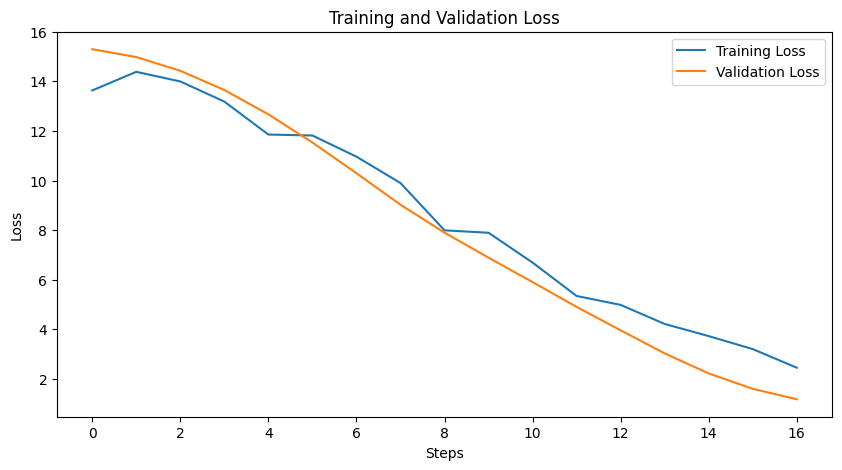

In [ ]:
training_args.logging_steps = 100

# Plotting loss
train_loss_values = trainer.state.log_history
train_loss = [entry['loss'] for entry in train_loss_values if 'loss' in entry]
eval_loss = [entry['eval_loss'] for entry in train_loss_values if 'eval_loss' in entry]

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

ROUGE Score

In [ ]:
!pip install rouge_score
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
!pip install bert-score
!pip install textstat

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=60415ac4feeee13fdd542dc4536d1339129550b3ace5a46a8db75da4fbae4760
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

#ROUGE
* ROUGE-N: Measures the overlap of n-grams (typically unigram and bigram) between the generated summary and the reference summary.
*ROUGE-L: Measures the longest common subsequence (LCS) between the generated and reference summaries.
*ROUGE-Precision: The fraction of n-grams in the generated summary that appear in the reference summary.
*ROUGE-Recall: The fraction of n-grams in the reference summary that appear in the generated summary.
*ROUGE-F1: A harmonic mean of ROUGE-Precision and ROUGE-Recall.

In [ ]:
from rouge_score import rouge_scorer

def calculate_rouge(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

rouge_scores = []
for i in range(len(decoded_preds)):
    reference = val_summaries[i]
    generated = decoded_preds[i]
    rouge_scores.append(calculate_rouge(reference, generated))

#BLEU (Bilingual Evaluation Understudy):
This metric measures how many words in the generated summary match the words in the reference summary. It's particularly popular for evaluating machine translation but is also used for summarization.

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

def calculate_bleu(reference, generated):
    reference_tokens = [reference.split()]
    generated_tokens = generated.split()
    return sentence_bleu(reference_tokens, generated_tokens)

# Example of calculating BLEU scores
bleu_scores = []
for i in range(len(decoded_preds)):
    reference = val_summaries[i]
    generated = decoded_preds[i]
    bleu_scores.append(calculate_bleu(reference, generated))


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

# METEOR (Metric for Evaluation of Translation with Explicit ORdering):
This metric is based on precision and recall but incorporates synonyms and stemming to allow for more flexible matches.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.translate.meteor_score import meteor_score

def calculate_meteor(reference, generated):
    # Tokenize the reference and generated texts
    reference_tokens = word_tokenize(reference)
    generated_tokens = word_tokenize(generated)

    return meteor_score([reference_tokens], generated_tokens)

meteor_scores = []
for i in range(len(decoded_preds)):
    reference = val_summaries[i]
    generated = decoded_preds[i]
    meteor_scores.append(calculate_meteor(reference, generated))


#BERTScore:
This metric uses BERT embeddings to evaluate the similarity between the generated summary and the reference summary at a semantic level.

In [ ]:
from bert_score import score

def calculate_bertscore(references, generated):
    P, R, F1 = score(generated, references, lang="en", verbose=True)
    return P.mean().item(), R.mean().item(), F1.mean().item()

references = val_summaries
bertscores = calculate_bertscore(references, decoded_preds)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 10.28 seconds, 11.09 sentences/sec


#Sentence Length:
Sentence Length: Average length of sentences in the generated summary compared to the reference summary.


In [ ]:
def calculate_sentence_length(text):
    sentences = text.split('.')
    lengths = [len(sentence.split()) for sentence in sentences if sentence]
    return sum(lengths) / len(lengths) if lengths else 0

sentence_lengths = [calculate_sentence_length(pred) for pred in decoded_preds]


# Readability (Flesch-Kincaid Score):
Readability Scores (e.g., Flesch-Kincaid): Measure how easy the generated summary is to read compared to the reference.

In [ ]:
import textstat

def calculate_readability(text):
    return textstat.flesch_kincaid_grade(text)

readability_scores = [calculate_readability(pred) for pred in decoded_preds]


# BART model for summarization

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Load the pre-trained BART model and tokenizer
model_name = "facebook/bart-base"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

In [ ]:
def encode_data(texts, summaries, tokenizer, max_length=512):
    input_encodings = tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')
    target_encodings = tokenizer(summaries, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

    return input_encodings, target_encodings

train_encodings, train_target_encodings = encode_data(train_texts, train_summaries, tokenizer)
val_encodings, val_target_encodings = encode_data(val_texts, val_summaries, tokenizer)

In [ ]:
import torch

class SummarizationDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels['input_ids'][idx])
        return item

    def __len__(self):
        return len(self.labels['input_ids'])

# Create PyTorch datasets
train_dataset = SummarizationDataset(train_encodings, train_target_encodings)
val_dataset = SummarizationDataset(val_encodings, val_target_encodings)

In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)


# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-37-3d661383006f>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-37-3d661383006f>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels['input_ids'][idx])


Step,Training Loss,Validation Loss
10,8.408400,8.908023
20,9.073300,8.276367
30,7.959900,7.630569
40,7.541900,7.149968
50,6.476700,6.740186
60,7.012900,6.255810
70,6.539400,5.740078
80,5.418100,4.957431
90,4.285400,3.641474
100,3.936300,3.012249


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


TrainOutput(global_step=177, training_loss=4.7729034747107555, metrics={'train_runtime': 332.2332, 'train_samples_per_second': 4.199, 'train_steps_per_second': 0.533, 'total_flos': 425291179622400.0, 'train_loss': 4.7729034747107555, 'epoch': 3.0})

In [ ]:
import torch

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Move model to the device
model.to(device)

# Move validation encodings to the device
val_input_ids = val_encodings['input_ids'].to(device)
val_attention_mask = val_encodings['attention_mask'].to(device)

In [ ]:
decoded_preds = []

for i in range(len(val_input_ids)):
    input_ids = val_input_ids[i:i+1].to(device)
    attention_mask = val_attention_mask[i:i+1].to(device)

    # Generate summary
    pred = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=150,
        num_beams=5,
        no_repeat_ngram_size=2,
        early_stopping=True,
        length_penalty=1.2
    )

    # Decode the summary
    decoded_pred = tokenizer.decode(pred[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    decoded_preds.append(decoded_pred)

import textwrap

# Define the maximum width for each line
max_width = 80

# Compare the decoded summaries with the actual summaries
for i in range(5):
    print(f"\n{'='*80}")
    print(f"Original Summary {i+1}:")
    print(textwrap.fill(val_summaries[i], width=max_width))
    print("\nGenerated Summary:")
    print(textwrap.fill(decoded_preds[i], width=max_width))
    print(f"{'='*80}\n")


Original Summary 1:
China's retail sales growth surged in August to its quickest pace in more than
three years, beating forecasts, but analysts said the jump largely reflected
stronger inflation, not necessarily quicker underlying growth. Retail sales,
which are tracked in nominal terms, grew 17.1% from a year earlier, compared
with 16.4% in July. The uptick roughly tracked a rise in annual consumer
inflation in August to 6.5%, from 5.6% in July. "Retail sales growth is
obviously strong. The problem is that the figures are being pushed up by the
rising inflation as well. So actually, on a real basis, I don't think there's
much of an acceleration," said Paul Cavey, an economist with Macquarie
Securities in Hong Kong. August's pace, the quickest since May 2004, beat
economists' expectations of a 16.5% rise. Consumer inflation data, released on
Tuesday, also surprised on the upside. Beijing would welcome an increase in real
buying activity by the country's consumers. It is trying to tilt

In [ ]:
# Define the maximum width for each line
max_width = 80

# Test input: raw financial news
test_news = """
The stock market witnessed a significant surge today, with major indices hitting all-time highs.
Investors reacted positively to the latest earnings reports, which showed better-than-expected results from several tech giants.
Additionally, the Federal Reserve's decision to keep interest rates unchanged contributed to the bullish sentiment.
As a result, the S&P 500 rose by 2.5%, while the NASDAQ climbed by 3%. Analysts are optimistic about the continued growth in the market,
though they caution that inflation remains a concern.
"""

# Tokenize the input
test_encoding = tokenizer.encode(test_news, return_tensors="pt", max_length=512, truncation=True).to(device)

# Generate the summary
generated_summary = model.generate(
    test_encoding,
    max_length=300,
    num_beams=7,
    early_stopping=True,
    no_repeat_ngram_size=2,
    length_penalty=1.2
)

# Decode the generated summary
decoded_summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

# Print the formatted generated summary
print(f"\n{'='*80}")
print("Generated Summary:")
print(textwrap.fill(decoded_summary, width=max_width))
print(f"{'='*80}\n")


Generated Summary:
—The stock market witnessed a significant surge today, with major indices
hitting all-time highs.—Investors reacted positively to the latest earnings
reports, which showed better-than-expected results from several tech giants.
(Additionally, the Federal Reserve's decision to keep interest rates unchanged
at 2.5 percent.)As a result, both the Dow and the S&P 500 rose by 2% while the
NASDAQ climbed by 3%. Analysts are optimistic about the continued growth in the
market, "though they caution that inflation remains a concern. "



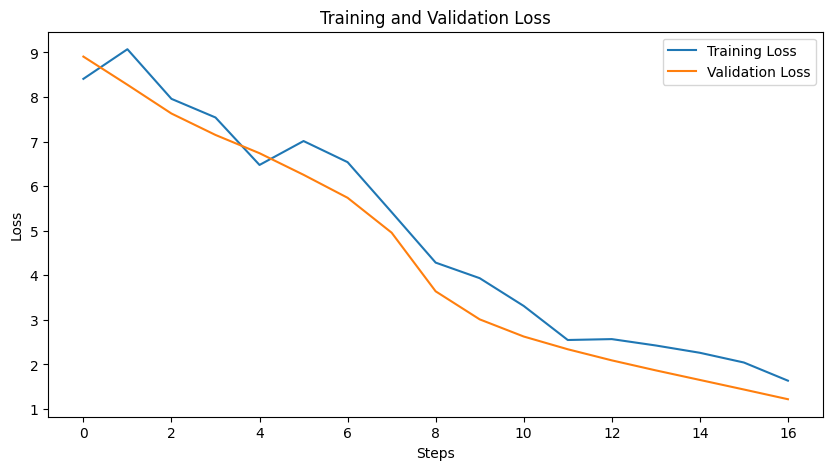

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
train_loss_values = trainer.state.log_history
train_loss = [entry['loss'] for entry in train_loss_values if 'loss' in entry]
eval_loss = [entry['eval_loss'] for entry in train_loss_values if 'eval_loss' in entry]

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from rouge_score import rouge_scorer

# Function to calculate ROUGE scores
def calculate_rouge(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

# Calculate ROUGE scores for BART
rouge_scores = [calculate_rouge(val_summaries[i], decoded_preds[i]) for i in range(len(decoded_preds))]

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

# Function to calculate BLEU score
def calculate_bleu(reference, generated):
    reference_tokens = [reference.split()]
    generated_tokens = generated.split()
    return sentence_bleu(reference_tokens, generated_tokens)

# Calculate BLEU scores for BART
bleu_scores = [calculate_bleu(val_summaries[i], decoded_preds[i]) for i in range(len(decoded_preds))]


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.translate.meteor_score import meteor_score

# Function to calculate METEOR score
def calculate_meteor(reference, generated):
    reference_tokens = word_tokenize(reference)
    generated_tokens = word_tokenize(generated)
    return meteor_score([reference_tokens], generated_tokens)

# Calculate METEOR scores for BART
meteor_scores = [calculate_meteor(val_summaries[i], decoded_preds[i]) for i in range(len(decoded_preds))]

In [ ]:
from bert_score import score

# Function to calculate BERTScore
def calculate_bertscore(references, generated):
    P, R, F1 = score(generated, references, lang="en", verbose=True)
    return P.mean().item(), R.mean().item(), F1.mean().item()

# Calculate BERTScore for BART
references = val_summaries
bertscores = calculate_bertscore(references, decoded_preds)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 9.25 seconds, 12.32 sentences/sec


In [ ]:
# Function to calculate average sentence length
def calculate_sentence_length(text):
    sentences = text.split('.')
    lengths = [len(sentence.split()) for sentence in sentences if sentence]
    return sum(lengths) / len(lengths) if lengths else 0

# Calculate sentence lengths for BART
sentence_lengths = [calculate_sentence_length(pred) for pred in decoded_preds]

In [ ]:
import textstat

# Function to calculate readability score
def calculate_readability(text):
    return textstat.flesch_kincaid_grade(text)

# Calculate readability scores for BART
readability_scores = [calculate_readability(pred) for pred in decoded_preds]

# DistilBART
It is a distilled version of the BART (Bidirectional and Auto-Regressive Transformers) model, designed to be smaller, faster, and more efficient while retaining much of the original model's performance. It is created through the process of knowledge distillation, where a smaller "student" model learns to mimic the behavior of a larger "teacher" model. DistilBART is particularly useful for tasks like text summarization and machine translation, offering a good trade-off between speed and accuracy compared to the full BART model.

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

model_name = "sshleifer/distilbart-cnn-12-6"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

In [ ]:
# Encode the data
train_encodings, train_target_encodings = encode_data(train_texts, train_summaries, tokenizer)
val_encodings, val_target_encodings = encode_data(val_texts, val_summaries, tokenizer)

# Create PyTorch datasets
train_dataset = SummarizationDataset(train_encodings, train_target_encodings)
val_dataset = SummarizationDataset(val_encodings, val_target_encodings)

In [ ]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-37-3d661383006f>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-37-3d661383006f>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels['input_ids'][idx])


Step,Training Loss,Validation Loss
10,0.607200,0.416527
20,0.544000,0.406069
30,0.504100,0.387365
40,0.479400,0.366797
50,0.494500,0.345326
60,0.418300,0.320765
70,0.364900,0.300257
80,0.391000,0.276740
90,0.354500,0.255275
100,0.332000,0.244198


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


TrainOutput(global_step=177, training_loss=0.351703430299705, metrics={'train_runtime': 660.8001, 'train_samples_per_second': 2.111, 'train_steps_per_second': 0.268, 'total_flos': 1079668679639040.0, 'train_loss': 0.351703430299705, 'epoch': 3.0})

In [ ]:
# Generate summaries for validation set
decoded_preds = []
for i in range(len(val_input_ids)):
    input_ids = val_input_ids[i:i+1].to(device)
    attention_mask = val_attention_mask[i:i+1].to(device)

    # Generate summary
    pred = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=150,
        num_beams=5,
        no_repeat_ngram_size=2,
        early_stopping=True,
        length_penalty=1.2
    )

    # Decode the summary
    decoded_pred = tokenizer.decode(pred[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    decoded_preds.append(decoded_pred)

# Compare the generated summaries with the original ones
for i in range(5):
    print(f"\nOriginal Summary {i+1}: {val_summaries[i]}")
    print(f"Generated Summary {i+1}: {decoded_preds[i]}")


Original Summary 1: China's retail sales growth surged in August to its quickest pace in more than three years, beating forecasts, but analysts said the jump largely reflected stronger inflation, not necessarily quicker underlying growth. Retail sales, which are tracked in nominal terms, grew 17.1% from a year earlier, compared with 16.4% in July. The uptick roughly tracked a rise in annual consumer inflation in August to 6.5%, from 5.6% in July. "Retail sales growth is obviously strong. The problem is that the figures are being pushed up by the rising inflation as well. So actually, on a real basis, I don't think there's much of an acceleration," said Paul Cavey, an economist with Macquarie Securities in Hong Kong. August's pace, the quickest since May 2004, beat economists' expectations of a 16.5% rise. Consumer inflation data, released on Tuesday, also surprised on the upside. Beijing would welcome an increase in real buying activity by the country's consumers. It is trying to tilt

In [ ]:
# Define the maximum width for each line
max_width = 80

# Test input: raw financial news
test_news = """
The stock market witnessed a significant surge today, with major indices hitting all-time highs.
Investors reacted positively to the latest earnings reports, which showed better-than-expected results from several tech giants.
Additionally, the Federal Reserve's decision to keep interest rates unchanged contributed to the bullish sentiment.
As a result, the S&P 500 rose by 2.5%, while the NASDAQ climbed by 3%. Analysts are optimistic about the continued growth in the market,
though they caution that inflation remains a concern.
"""

# Generate the summary
generated_summary = model.generate(
    test_encoding,
    max_length=300,
    num_beams=7,
    early_stopping=True,
    no_repeat_ngram_size=2,
    length_penalty=1.2
)

# Decode the generated summary
decoded_summary = tokenizer.decode(generated_summary[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

# Print the generated summary
print(f"\n{'='*80}")
print("Generated Summary:")
print(textwrap.fill(decoded_summary, width=max_width))
print(f"{'='*80}\n")


Generated Summary:
The stock market witnessed a significant surge today, with major indices hitting
all-time highs. Specifically, investors reacted positively to the latest
earnings reports, which showed better-than-expected results from several tech
giants.Additionally, the Federal Reserve's decision to keep interest rates
unchanged contributed to a bullish sentiment.As a result, The S&P 500 rose by
2.5%, while the NASDAQ climbed by 3%. Analysts are optimistic about the
continued growth in the market, though they caution that inflation remains a
concern.



# *Evaluating different models*

# T5-small

In [ ]:
results = pd.DataFrame({
    'ROUGE-1': [score['rouge1'].fmeasure for score in rouge_scores],
    'ROUGE-2': [score['rouge2'].fmeasure for score in rouge_scores],
    'ROUGE-L': [score['rougeL'].fmeasure for score in rouge_scores],
    'BLEU': bleu_scores,
    'METEOR': meteor_scores,
    'BERTScore Precision': bertscores[0],
    'BERTScore Recall': bertscores[1],
    'BERTScore F1': bertscores[2],
    'Sentence Length': sentence_lengths,
    'Readability': readability_scores,
})

results


,ROUGE-1,ROUGE-2,ROUGE-L,BLEU,METEOR,BERTScore Precision,BERTScore Recall,BERTScore F1,Sentence Length,Readability
0,0.360169,0.293617,0.271186,0.018269,0.159086,0.881691,0.840432,0.85982,43.000000,18.5
1,0.548223,0.523077,0.406091,0.173976,0.369776,0.881691,0.840432,0.85982,55.000000,22.4
2,0.345763,0.163823,0.155932,0.062884,0.183206,0.881691,0.840432,0.85982,46.000000,21.0
3,0.389776,0.237942,0.223642,0.099331,0.198004,0.881691,0.840432,0.85982,23.500000,10.1
4,0.411268,0.334278,0.338028,0.046268,0.256795,0.881691,0.840432,0.85982,25.666667,12.0
...,...,...,...,...,...,...,...,...,...,...
109,0.164306,0.056980,0.101983,0.000535,0.074439,0.881691,0.840432,0.85982,22.500000,9.7
110,0.405797,0.291545,0.231884,0.051934,0.221276,0.881691,0.840432,0.85982,39.500000,17.5
111,0.484536,0.197917,0.216495,0.078875,0.301227,0.881691,0.840432,0.85982,20.500000,8.9
112,0.440945,0.384000,0.393701,0.224017,0.587717,0.881691,0.840432,0.85982,45.000000,19.5


# *Bart Base*

In [ ]:
results = pd.DataFrame({
    'ROUGE-1': [score['rouge1'].fmeasure for score in rouge_scores],
    'ROUGE-2': [score['rouge2'].fmeasure for score in rouge_scores],
    'ROUGE-L': [score['rougeL'].fmeasure for score in rouge_scores],
    'BLEU': bleu_scores,
    'METEOR': meteor_scores,
    'BERTScore Precision': bertscores[0],
    'BERTScore Recall': bertscores[1],
    'BERTScore F1': bertscores[2],
    'Sentence Length': sentence_lengths,
    'Readability': readability_scores,
})

results

,ROUGE-1,ROUGE-2,ROUGE-L,BLEU,METEOR,BERTScore Precision,BERTScore Recall,BERTScore F1,Sentence Length,Readability
0,0.425447,0.367265,0.397614,0.063993,0.207997,0.936809,0.908661,0.920975,11.600000,6.4
1,0.873134,0.774436,0.858209,0.641280,0.800534,0.936809,0.908661,0.920975,15.500000,9.3
2,0.695652,0.637500,0.695652,0.325261,0.435426,0.936809,0.908661,0.920975,19.833333,14.6
3,0.481100,0.463668,0.481100,0.102267,0.244903,0.936809,0.908661,0.920975,35.500000,14.6
4,0.615385,0.568579,0.605459,0.257611,0.362910,0.936809,0.908661,0.920975,17.571429,9.8
...,...,...,...,...,...,...,...,...,...,...
109,0.536131,0.473068,0.503497,0.139920,0.294533,0.936809,0.908661,0.920975,12.000000,8.2
110,0.590078,0.556430,0.590078,0.216747,0.365003,0.936809,0.908661,0.920975,23.400000,11.0
111,0.904110,0.829493,0.885845,0.547552,0.773775,0.936809,0.908661,0.920975,18.166667,6.5
112,0.493333,0.472973,0.480000,0.290336,0.609383,0.936809,0.908661,0.920975,27.500000,14.8


#*DistilBart*

In [ ]:
rouge_scores = [calculate_rouge(val_summaries[i], decoded_preds[i]) for i in range(len(decoded_preds))]

bleu_scores = [calculate_bleu(val_summaries[i], decoded_preds[i]) for i in range(len(decoded_preds))]

meteor_scores = [calculate_meteor(val_summaries[i], decoded_preds[i]) for i in range(len(decoded_preds))]

bertscores = calculate_bertscore(references, decoded_preds)

sentence_lengths = [calculate_sentence_length(pred) for pred in decoded_preds]

readability_scores = [calculate_readability(pred) for pred in decoded_preds]


results = pd.DataFrame({
    'ROUGE-1': [score['rouge1'].fmeasure for score in rouge_scores],
    'ROUGE-2': [score['rouge2'].fmeasure for score in rouge_scores],
    'ROUGE-L': [score['rougeL'].fmeasure for score in rouge_scores],
    'BLEU': bleu_scores,
    'METEOR': meteor_scores,
    'BERTScore Precision': bertscores[0],
    'BERTScore Recall': bertscores[1],
    'BERTScore F1': bertscores[2],
    'Sentence Length': sentence_lengths,
    'Readability': readability_scores,
})

results

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 9.26 seconds, 12.31 sentences/sec


,ROUGE-1,ROUGE-2,ROUGE-L,BLEU,METEOR,BERTScore Precision,BERTScore Recall,BERTScore F1,Sentence Length,Readability
0,0.449304,0.411178,0.405567,0.073296,0.229805,0.946362,0.905491,0.923683,14.375000,7.5
1,0.675799,0.635945,0.675799,0.328766,0.488542,0.946362,0.905491,0.923683,24.666667,14.1
2,0.709877,0.670807,0.709877,0.363530,0.461481,0.946362,0.905491,0.923683,13.222222,11.1
3,0.648649,0.616314,0.648649,0.309718,0.392240,0.946362,0.905491,0.923683,27.750000,11.7
4,0.591479,0.569270,0.591479,0.209112,0.339707,0.946362,0.905491,0.923683,17.000000,9.6
...,...,...,...,...,...,...,...,...,...,...
109,0.540793,0.482436,0.508159,0.184710,0.321934,0.946362,0.905491,0.923683,16.714286,9.6
110,0.598425,0.580475,0.593176,0.234502,0.376445,0.946362,0.905491,0.923683,28.000000,12.8
111,0.804233,0.748663,0.793651,0.512867,0.648493,0.946362,0.905491,0.923683,25.666667,9.8
112,0.480519,0.460526,0.467532,0.311471,0.619775,0.946362,0.905491,0.923683,28.000000,15.1


# *Model Comparison: BART, T5, and DistilBART*

1.   ROUGE Scores:
BART consistently outperforms both T5 and DistilBART, particularly in ROUGE-1, ROUGE-2, and ROUGE-L, indicating superior content preservation and n-gram matching.
T5 shows the lowest ROUGE scores, struggling with phrase-level and structural similarities.
DistilBART closely follows BART, but with slightly lower ROUGE scores.

2.  BLEU and METEOR Scores:BART achieves higher BLEU and METEOR scores, suggesting better accuracy and alignment with human judgement.
T5 lags significantly in these metrics, indicating less accurate and human-like summaries.
DistilBART performs well but is slightly behind BART in these areas.

3. BERTScore:DistilBART slightly outperforms BART in BERTScore, indicating that its summaries are marginally more semantically similar to the reference texts.
BART follows closely, while T5 has lower BERTScores, reflecting less semantic alignment.

4. Sentence Length and Readability:BART generates more concise summaries with higher readability scores, making them easier to read.
T5 tends to produce longer, more complex summaries, potentially reducing readability.
DistilBART balances between sentence length and readability but leans towards longer summaries.

# *Overall recommendation*
BART is the top performer across most metrics, making it the best choice for high-quality, concise, and readable summaries.
DistilBART offers a good trade-off between performance and computational efficiency, suitable for scenarios where resources are limited.
T5 lags behind both BART and DistilBART, making it less ideal for tasks requiring high-quality summarization.



